In [15]:
#Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
#load data set
diamonds = sns.load_dataset('diamonds')

In [11]:
df = diamonds

In [12]:
#look at dataset to see what columns are present

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#prepare dataset for univariate analyses by breaking up cut into separate data sets

ideal = diamonds[diamonds['cut']== 'Ideal']
ideal.reset_index(inplace = True)

ideal.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
2,13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
3,16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
4,39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


In [8]:
#create next dataframe by cut
premium = df[df['cut']=='Premium']
premium.reset_index(inplace = True)

premium.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
3,14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
4,15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68


In [9]:
#run ttest to see if price of diamond is the same for premium vs ideal cuts
stats.ttest_ind(ideal['price'], premium['price'])

Ttest_indResult(statistic=-25.650910588183198, pvalue=8.585274269295433e-144)

In [10]:
#you reject the null hypothesis (that the price is the same for premium vs ideal cut diamonds) 
#for the above t-test as the p-value is < .05

In [13]:
stats.f_oneway(df['price'][df['cut'] == 'Ideal'],
              df['price'][df['cut'] == 'Premium'],
               diamonds['price'][df['cut']== 'Good'])

F_onewayResult(statistic=335.8568601267539, pvalue=2.2034069412537372e-145)

In [14]:
#again you would reject the null hypothesis (that the price is the same for the different cuts 
#of diamonds) because the p-value is < .05

In [ ]:
#MULTIVARIATE Plot

<Figure size 756x518.4 with 0 Axes>

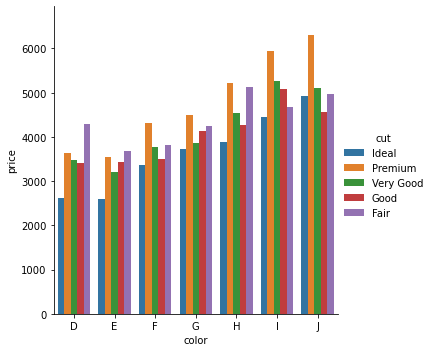

In [41]:
#Looking at relationship between color and price by cut
fig = plt.figure(figsize=(10.5,7.2))
sns.catplot(x = 'color',  y = 'price', hue = 'cut', data= df, kind='bar', errwidth=0)